In [1]:
import sys
sys.path.insert(0,'../src/')

from utils import *
from multiply_connected_pipe import *

from matplotlib import pyplot as plt
import numpy as np
import pickle

In [3]:
with open('global_pipe_dense_solve.pickle','rb') as f:
    dense_solve = pickle.load(f)
with open('global_pipe_fmm_solve.pickle','rb') as f:
    fmm_solve = pickle.load(f)

In [4]:
b = dense_solve.boundary_value(0)
b = np.concatenate([b.real,b.imag])
omega_fmm = fmm_solve.omegas[0]
omega_fmm_sep = np.concatenate([omega_fmm.real,omega_fmm.imag])
omega_dense = dense_solve.omegas[0]
omega_dense_sep = np.concatenate([omega_dense.real,omega_dense.imag])

In [5]:
dense_residual = (dense_solve.mat_vec(omega_dense_sep) - b)
fmm_residual = (fmm_solve.mat_vec(omega_fmm_sep) - b)

In [6]:
dense_residual

array([-4.96047647e-12, -4.91562346e-12, -4.66648942e-12, ...,
       -3.89377419e-12, -6.62225830e-12, -4.74642547e-12])

In [7]:
fmm_residual

array([ 6.40820730e-13,  1.75726100e-12,  7.74047493e-13, ...,
       -2.61479727e-12, -2.64321898e-12, -4.17799129e-12])

In [8]:
np.linalg.norm(dense_solve.mat_vec(omega_dense_sep) - fmm_solve.mat_vec(omega_dense_sep)) / np.linalg.norm(b)

2.793920997643297e-12

In [9]:
np.linalg.norm(dense_residual) / np.linalg.norm(b)

8.836057940310945e-12

In [10]:
np.linalg.norm(fmm_residual) / np.linalg.norm(b)

4.655111351886207e-12

In [11]:
np.linalg.norm(fmm_residual - dense_residual) / np.linalg.norm(b)

1.0438460031783665e-11

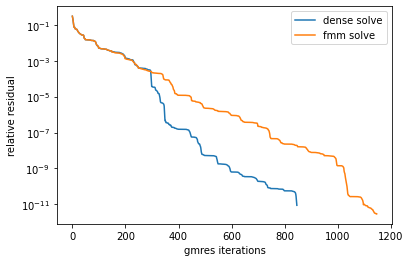

In [13]:
for callback in dense_solve.callbacks:
    plt.semilogy(np.arange(len(callback.residuals)), callback.residuals,label='dense solve')
for callback in fmm_solve.callbacks:
    plt.semilogy(np.arange(len(callback.residuals)), callback.residuals,label='fmm solve')

# for i in np.arange(0,1200,RESTART):
#     plt.axvline(i)
plt.legend()
plt.xlabel('gmres iterations')
plt.ylabel('relative residual')
print()